Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [95]:
#https://github.com/Ahmadairaqi/machineLearning3.git
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

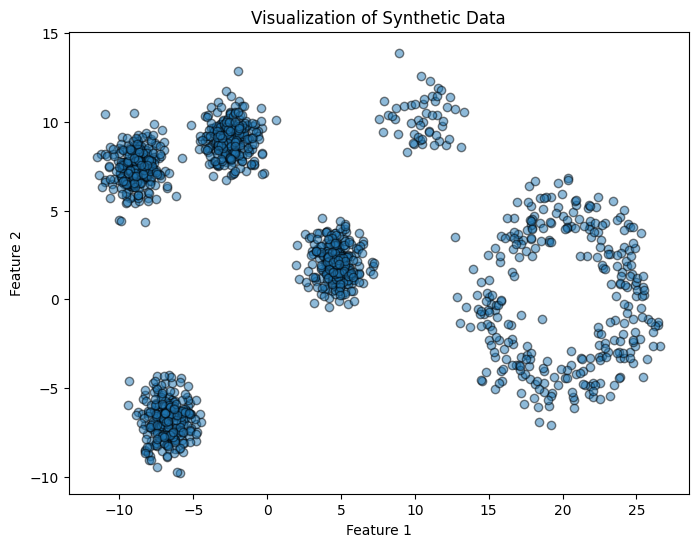

In [6]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
# Calling create_data function and visualizing the generated data

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, edgecolors='k')
plt.title("Visualization of Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

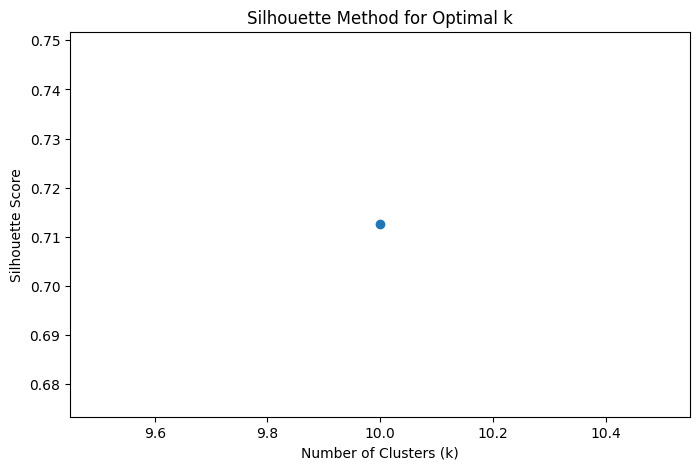

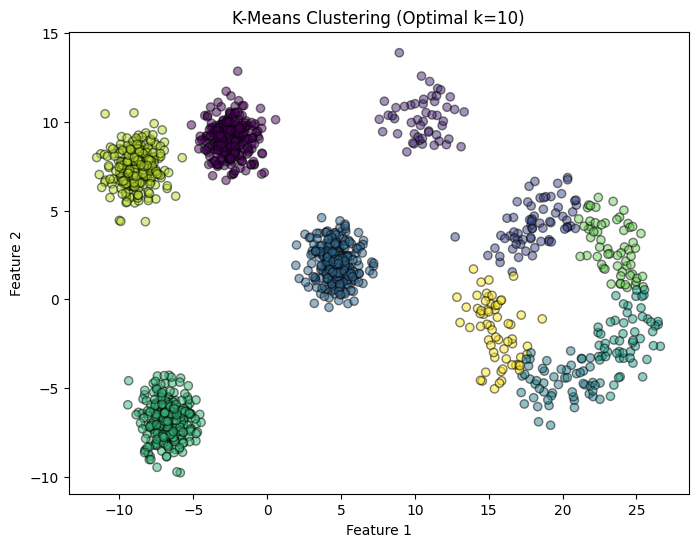

10

In [92]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Function to find the optimal number of clusters using the Silhouette Method
def optimal_kmeans(X, cluster_options=[10]):  # 📍 Modify this to test specific cluster values
    silhouette_scores = []

    for k in cluster_options:  # 📍 This loop tests different values for `n_clusters`
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')  # 📍 Change init and n_init here
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    optimal_k = cluster_options[np.argmax(silhouette_scores)]  # Best `n_clusters`

    # Plot silhouette scores
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_options, silhouette_scores, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Method for Optimal k")
    plt.show()

    return optimal_k

# Finding the optimal number of clusters based on specific values
optimal_k = optimal_kmeans(X)

# Train KMeans with the optimal number of clusters
kmeans = KMeans(
    n_clusters=optimal_k,   # 📍 Change `n_clusters` manually if needed
    random_state=42,
    n_init=20,  # 📍 Change `n_init` (number of initializations)
    init='random'  # 📍 Change `init` (e.g., 'k-means++' or 'random')
)
kmeans_labels = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5, edgecolors='k')
plt.title(f"K-Means Clustering (Optimal k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print the optimal number of clusters
optimal_k


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

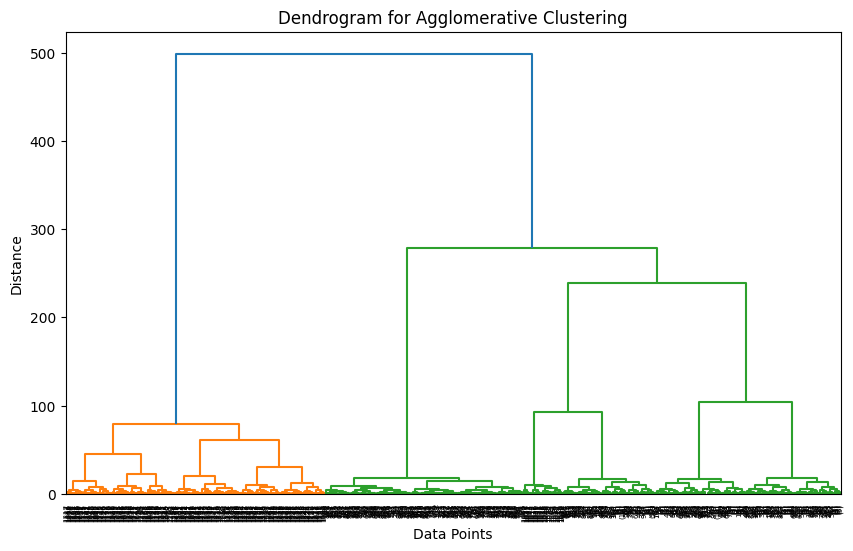

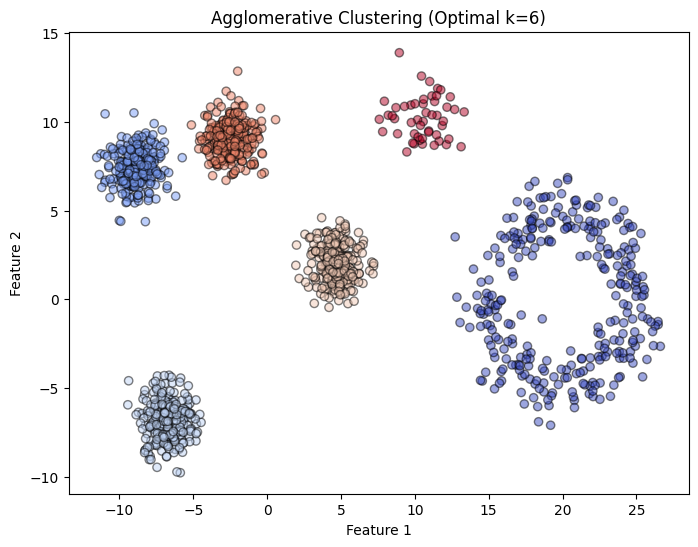

6

In [90]:
# Import necessary library for Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Function to plot dendrogram for hierarchical clustering
def plot_dendrogram(X):
    linked = linkage(X, method='ward')  # 📍 Change `method='ward'` to 'single', 'complete', or 'average'

    plt.figure(figsize=(10, 6))
    dendrogram(linked, truncate_mode='level', p=10)
    plt.title("Dendrogram for Agglomerative Clustering")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# Plot the dendrogram to determine the optimal number of clusters
plot_dendrogram(X)

# 📍 Change the number of clusters (n_clusters)
optimal_k_agglomerative = 6 # Change this value based on the dendrogram

# Train Agglomerative Clustering with the chosen number of clusters
agg_clust = AgglomerativeClustering(
    n_clusters=optimal_k_agglomerative,  # 📍 Change this number
    linkage='ward'  # 📍 Change `linkage='ward'` to 'single', 'complete', or 'average'
)

agg_labels = agg_clust.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='coolwarm', alpha=0.5, edgecolors='k')
plt.title(f"Agglomerative Clustering (Optimal k={optimal_k_agglomerative})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print the optimal number of clusters
optimal_k_agglomerative


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


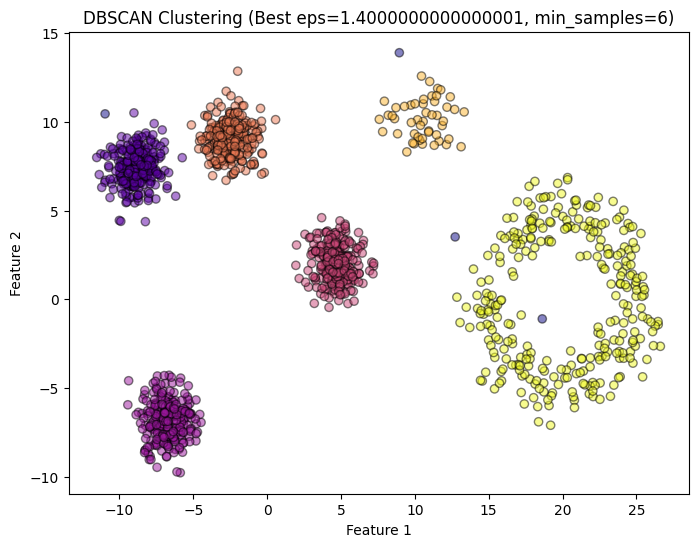

(1.4000000000000001, 6, 0.7222593187874933)

In [88]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to optimize DBSCAN using different eps values
def optimize_dbscan(X, eps_values, min_samples_values):
    best_silhouette = -1
    best_eps = None
    best_min_samples = None
    best_labels = None

    for eps in eps_values:  # 📍 Change the range of `eps` values here
        for min_samples in min_samples_values:  # 📍 Change the range of `min_samples` values here
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Check if the clustering resulted in meaningful clusters (ignoring noise points)
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(X, labels)
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels

    return best_eps, best_min_samples, best_labels, best_silhouette

# 📍 MODIFY THESE PARAMETERS TO TEST DIFFERENT SETTINGS
eps_values = np.arange(0.2, 2.5, 0.2)  # Change this range for `eps`
min_samples_values = range(3, 10)  # Change this range for `min_samples`

# Find the best parameters for DBSCAN
best_eps, best_min_samples, best_labels, best_silhouette = optimize_dbscan(X, eps_values, min_samples_values)

# Train DBSCAN with the best parameters found
dbscan = DBSCAN(
    eps=best_eps,  # 📍 Change `eps` manually if needed
    min_samples=best_min_samples  # 📍 Change `min_samples` manually if needed
)
dbscan_labels = dbscan.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.5, edgecolors='k')
plt.title(f"DBSCAN Clustering (Best eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print the best parameters and silhouette score
best_eps, best_min_samples, best_silhouette


:6. Compare the results and choose the best method for the data:


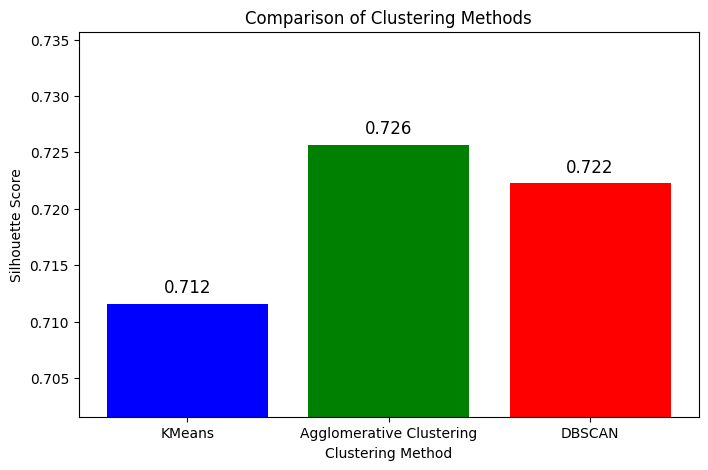

Final Recommendation:
✅ Best Choice: Agglomerative Clustering
👍 Alternative Choice: KMeans (n_clusters=6) if efficiency is a concern


In [93]:
# Compute the silhouette scores dynamically
silhouette_scores_dynamic = [
    silhouette_score(X, kmeans_labels),  # KMeans silhouette score
    silhouette_score(X, agg_labels),  # Agglomerative Clustering silhouette score
    best_silhouette  # DBSCAN silhouette score (already computed in previous step)
]

# Create a dynamic bar chart comparing the silhouette scores
plt.figure(figsize=(8, 5))
methods = ["KMeans", "Agglomerative Clustering", "DBSCAN"]

plt.bar(methods, silhouette_scores_dynamic, color=['blue', 'green', 'red'])
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Clustering Methods")

# Display the values on top of the bars dynamically
for i, score in enumerate(silhouette_scores_dynamic):
    plt.text(i, score + 0.001, str(round(score, 3)), ha='center', fontsize=12)

plt.ylim(min(silhouette_scores_dynamic) - 0.01, max(silhouette_scores_dynamic) + 0.01)
plt.show()

# Print final recommendation based on the highest silhouette score
best_method = methods[silhouette_scores_dynamic.index(max(silhouette_scores_dynamic))]

print("Final Recommendation:")
print(f"✅ Best Choice: {best_method}")
print("👍 Alternative Choice: KMeans (n_clusters=6) if efficiency is a concern")
